<a href="https://colab.research.google.com/github/pachterlab/BLCSBGLKP_2020/blob/master/notebooks/trbseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Mon Nov  2 20:33:05 UTC 2020


In [2]:
!git clone https://github.com/pachterlab/BLCSBGLKP_2020.git
!mkdir temporary

Cloning into 'BLCSBGLKP_2020'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 232 (delta 85), reused 85 (delta 14), pack-reused 0
Receiving objects: 100% (232/232), 42.23 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (85/85), done.


# TRBSeq comparison

N1 GACCCCAAAATCAGCGAAATG CACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGC
   GACCCCAAAATCAGCGAAATG
   (Forward primer)
N2 AAGGAACTGATTACAAACATTGGC CGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCA
   AAGGAACTGATTACAAACATTGGC
   (Forward primer)
Rpp30 GATTTGGACCTGCGAGCG GGTTCTGACCTGAAGGCTCTGCGCGGACTTGTGGAGACAGCCGCTC
      GATTTGGACCTGCGAGCG
      (Forward primer)

In [3]:
!pip install anndata

     |████████████████████████████████| 122kB 3.3MB/s 


In [4]:
# We need cmake to install kallisto and bustools from source
!apt update
!apt install -y cmake

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu bion

In [5]:
!apt-get install autoconf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  automake autotools-dev libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc libtool gettext m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev libsigsegv2 m4
0 upgraded, 5 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,082 kB of archives.
After this operation, 3,994 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsigsegv2 amd64 2.12-1 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 m4 amd64 1.4.18-1 [197 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 autoconf all 2.69-11 [322 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 automake all 1:1.15.1-3ubuntu2 [509 kB]
Fet

In [6]:
!git clone https://github.com/pachterlab/kallisto.git
!mv kallisto/ temporary/
!cd temporary/kallisto && git checkout covid && mkdir build && cd build && cmake .. && make
!chmod +x temporary/kallisto/build/src/kallisto
!mv temporary/kallisto/build/src/kallisto /usr/local/bin/

Cloning into 'kallisto'...
remote: Enumerating objects: 3857, done.
remote: Total 3857 (delta 0), reused 0 (delta 0), pack-reused 3857
Receiving objects: 100% (3857/3857), 4.08 MiB | 14.45 MiB/s, done.
Resolving deltas: 100% (2514/2514), done.
Branch 'covid' set up to track remote branch 'covid' from 'origin'.
Switched to a new branch 'covid'
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
shared build
-- Looking for pthread.h
-- Looking for pthread.

In [7]:
!git clone https://github.com/BUStools/bustools.git
!mv bustools/ temporary/
!cd temporary/bustools && git checkout covid && mkdir build && cd build && cmake .. && make
!chmod +x temporary/bustools/build/src/bustools
!mv temporary/bustools/build/src/bustools /usr/local/bin/

Cloning into 'bustools'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 907 (delta 33), reused 33 (delta 16), pack-reused 856
Receiving objects: 100% (907/907), 604.53 KiB | 7.03 MiB/s, done.
Resolving deltas: 100% (552/552), done.
Branch 'covid' set up to track remote branch 'covid' from 'origin'.
Switched to a new branch 'covid'
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detectin

In [8]:
!kallisto version
!bustools version

kallisto, version 0.46.2
bustools, version 0.40.0


In [9]:
!kallisto index -i ./temporary/trb_index.idx -k 21 BLCSBGLKP_2020/data/trbseq/transcriptome.fa


[build] loading fasta file BLCSBGLKP_2020/data/trbseq/transcriptome.fa
[build] k-mer length: 21
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 3 contigs and contains 117 k-mers 



In [10]:
!kallisto bus -x TRBSeq -t 2 -o ./temporary/out_trb -i ./temporary/trb_index.idx BLCSBGLKP_2020/data/trbseq/R1.fastq.gz BLCSBGLKP_2020/data/trbseq/R2.fastq.gz


[index] k-mer length: 21
[index] number of targets: 3
[index] number of k-mers: 117
[index] number of equivalence classes: 3
[quant] will process sample 1: BLCSBGLKP_2020/data/trbseq/R1.fastq.gz
                               BLCSBGLKP_2020/data/trbseq/R2.fastq.gz
[quant] finding pseudoalignments for the reads ... done
[quant] processed 12,062,027 reads, 12,033,441 reads pseudoaligned


In [11]:
# sort the BUS file by barcode
!bustools sort -t 2 -m 1G -o temporary/out_trb/sort.bus temporary/out_trb/output.bus
# Correct to the barcodes in the whitelist (obtained from the SampleSheet)
!bustools correct -d temporary/out_trb/dump.txt -w BLCSBGLKP_2020/data/trbseq/whitelist.txt  -o temporary/out_trb/sort.correct.bus temporary/out_trb/sort.bus
# Sort again to sum the Amplicon counts
!bustools sort -t 2 -m 1G -o temporary/out_trb/sort.correct.sort.bus temporary/out_trb/sort.correct.bus

# write busfile to text output
!bustools text -p temporary/out_trb/sort.correct.sort.bus > temporary/out_trb/data.txt

# Write the sorted bus file out for barcode QC
!bustools text -p temporary/out_trb/sort.bus > temporary/out_trb/sort.txt

tcmalloc: large alloc 1073741824 bytes == 0x564489bde000 @  0x7f19768db887 0x5644883dd3fd 0x56448839ef4a 0x7f197575bb97 0x5644883a007a
Read in 12033441 BUS records
Found 96 barcodes in the whitelist
Processed 32273 BUS records
In whitelist = 283
Corrected    = 6715
Uncorrected  = 25275
tcmalloc: large alloc 1073741824 bytes == 0x5652b3d9a000 @  0x7f501928e887 0x5652b23dc3fd 0x5652b239df4a 0x7f501810eb97 0x5652b239f07a
Read in 6998 BUS records
Read in 283 BUS records
Read in 32273 BUS records


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import anndata

from collections import defaultdict
from collections import OrderedDict


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.patches as mpatches



from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.special import expit as sigmoid

def nd(arr):
    return np.asarray(arr).reshape(-1)

# Effectivley python implementation of bustools covid (to be made)
def make_mtx(bcs, ecs, cnt, unique_ecs):
    
    bold = bcs[0]
    eold = ecs[0]
    cold = cnt[0]
    mtx = []
    
    d = defaultdict()
    #d[eold] = cold
    bold = 0
    for idx, b in enumerate(bcs):
    
        if b != bold and idx > 0:
            count = []
            for e in unique_ecs:
    
                count.append(d.get(e, 0))
            
            mtx.append(count)
            d = defaultdict()
    
        d[ecs[idx]] = cnt[idx]
    
        bold = b
    count = []
    for e in unique_ecs:
        count.append(d.get(e, 0))
    mtx.append(count)
    
    return np.asarray(mtx)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

cm = {1:"#D43F3A", 0:"#3182bd"}
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

## Load results

### Load the BUS file in text format

In [13]:
data_path = "temporary/out_trb/"
df = pd.read_csv(data_path + "data.txt", sep="\t", header=None, names=["bcs", "umi", "ecs", "cnt"])
df = df.sort_values("bcs")

In [14]:
df.head()

bcs                       umi  ecs     cnt
0  AAAGAAGATACTTAA  AAAAAAAAAAAAAAAAAAAAAAAA    0   27556
1  AAAGAAGATACTTAA  AAAAAAAAAAAAAAAAAAAAAAAA    1  128595
2  AAAGAAGATACTTAA  AAAAAAAAAAAAAAAAAAAAAAAA    2     148
3  AAAGTATGATATGTC  AAAAAAAAAAAAAAAAAAAAAAAA    0      36
4  AAAGTATGATATGTC  AAAAAAAAAAAAAAAAAAAAAAAA    1   51116

In [15]:
print("We recovered {:,} reads total".format(df.cnt.sum()))

We recovered 12,003,209 reads total


### Genes from our reference

In [16]:
gene = pd.read_csv(data_path + "/transcripts.txt", header=None, names = ["gene"])

In [17]:
gene

gene
0     N1
1     N2
2  RPP30

In [18]:
df.ecs.unique()

array([0, 1, 2])

### Make well x gene matrix

In [19]:
# Well by gene matrix
bcs = df.bcs.values
ecs = df.ecs.values
cnt = df.cnt.values

unique_ecs = np.unique(ecs)

In [20]:
mtx = make_mtx(bcs, ecs, cnt, unique_ecs)

In [21]:
mtx[0:10]

array([[ 27556, 128595,    148],
       [    36,  51116,      2],
       [    66, 149288,     16],
       [    94,  15974,      1],
       [    53,  86699,     20],
       [ 76190,  14960,      4],
       [129459,  16829,     16],
       [165314, 105982,     31],
       [  1101,  30952,      4],
       [  4954, 158847,     39]])

In [22]:
obs = {"bcs": df.drop_duplicates("bcs")["bcs"].values}

____________________

### Make anndata object

In [23]:
adata = anndata.AnnData(X=mtx, obs = obs, var = gene)
adata.obs.index = adata.obs.bcs.values

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [24]:
adata.write("temporary/trb.h5ad")

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [25]:
adata

AnnData object with n_obs × n_vars = 96 × 3
    obs: 'bcs'
    var: 'gene'

In [26]:
adata.var

gene
0     N1
1     N2
2  RPP30

# Load map between

In [27]:
m = pd.read_csv("BLCSBGLKP_2020/data/trbseq/ss2trb.txt", sep="\t", header=None, names=["ss_bcs", "trb_bcs"])

In [28]:
m.head()

ss_bcs          trb_bcs
0  AAGCTCCTAGTTGCGC  TTCCCTGAACCTCGT
1  AAGCTCCTCAGATCTT  CTCCTGTACATATAT
2  AAGCTCCTCTGTTACA  ACGTTTCACTATAAT
3  AAGCTCCTTCATGACA  ATGACCGACCACTTT
4  AATCGTCTAGTTGCGC  TACTACTATTATAAT

# Load KB file

In [29]:
kb_raw = anndata.read_h5ad("BLCSBGLKP_2020/data/kb/adata.h5ad")
kb_raw.obs.index = kb_raw.obs.bcs.values

In [30]:
kb_raw

AnnData object with n_obs × n_vars = 768 × 5
    obs: 'bcs', 'ecs', 'cnt', 'plate', 'well', 'lysate', 'Twist', 'ATCC_RNA', 'ATCC_viral', 'Twist_bool', 'ATCC_viral_bool', 'ATCC_RNA_bool'
    var: 'gene'
    obsm: 'X_pca'
    layers: 'log1p', 'norm', 'raw', 'scale'

In [31]:
a = np.logical_and((kb_raw.obs.plate=="Plate1").values, (kb_raw.obs.lysate=="HEK293").values)
b = np.logical_and(a, kb_raw.obs.ATCC_RNA.values==0)
c = np.logical_and(b, kb_raw.obs.ATCC_viral.values==0)

kb = kb_raw[b]

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [32]:
kb = kb[kb.obs.loc[m.ss_bcs].index]
adata = adata[adata.obs.loc[m.trb_bcs].index]

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [33]:
g = "N1"

a = nd(adata.X[:,adata.var.gene==g])
b = nd(kb.layers['raw'][:,kb.var.gene==g])

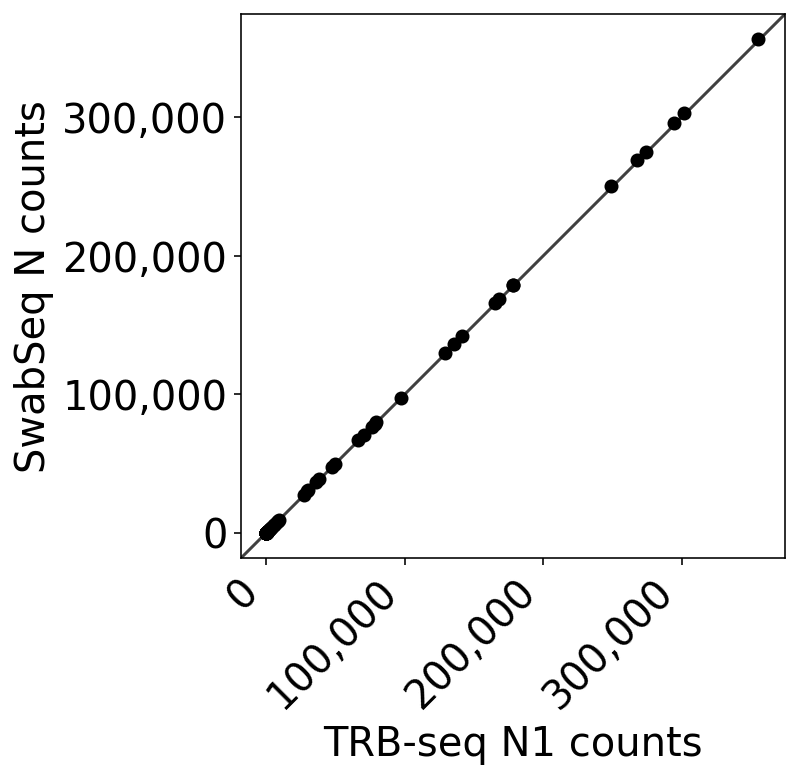

In [35]:
fig, ax = plt.subplots(figsize=(5,5))

x = a
y = b

ax.scatter(x, y, color="k")
yex(ax)

ax.set_xlabel("TRB-seq {} counts".format(g))
ax.set_ylabel("SwabSeq {} counts".format(g[0]))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
    
plt.savefig("./ss_v_trb.png",bbox_inches='tight', dpi=300)
plt.show()